In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt


In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 47s 4us/step


In [3]:
img_size = 28

In [4]:
x_train_org.dtype

dtype('uint8')

In [5]:
x_train = x_train_org.astype('float32')
x_test = x_test_org.astype('float32')

x_train /= 255
x_test /= 255


y_train = keras.utils.to_categorical(y_train_org)
y_test = keras.utils.to_categorical(y_test_org)


In [6]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
x_test = x_test.reshape(-1, img_size, img_size, 1)

In [7]:
print('X shape: ', x_train.shape)
print('y shape: ', y_train.shape)

X shape:  (60000, 28, 28, 1)
y shape:  (60000, 10)


In [8]:
# Build the model

model = Sequential()
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (5,5), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))



C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,278 (176.87 KB)

 Trainable params: 45,278 (176.87 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Adam optimizer with learning rate of 0.001
adam_optimizer = Adam(learning_rate=0.001)

In [11]:
# Compile Model
model.compile(optimizer=adam_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
%%time
# Fit Model

history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=256,
                    epochs=200,
                    validation_split=0.2
                    )


Epoch 1/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5743 - loss: 1.2485 - val_accuracy: 0.9573 - val_loss: 0.1518
Epoch 2/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9345 - loss: 0.2174 - val_accuracy: 0.9717 - val_loss: 0.0946
Epoch 3/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9552 - loss: 0.1467 - val_accuracy: 0.9768 - val_loss: 0.0784
Epoch 4/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9627 - loss: 0.1222 - val_accuracy: 0.9788 - val_loss: 0.0703
Epoch 5/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9670 - loss: 0.1071 - val_accuracy: 0.9825 - val_loss: 0.0603
Epoch 6/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9719 - loss: 0.0917 - val_accuracy: 0.9830 - val_loss: 0.0584
Epoch 7/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9750 - loss: 0.0822 - val_accuracy: 0.9851 - val_loss: 0.0518
Epoch 8/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9769 - loss: 0.0766 - 

In [16]:
model.save('models/model_basic_cnn.keras')
model.save_weights('models/model_basic_cnn.weights.h5')

In [17]:
# loss, accuracy = model.evaluate(X_test_s, y_test)
result = model.evaluate(x_test, y_test)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9914 - loss: 0.0373


[0.028095291927456856, 0.993399977684021]

In [18]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

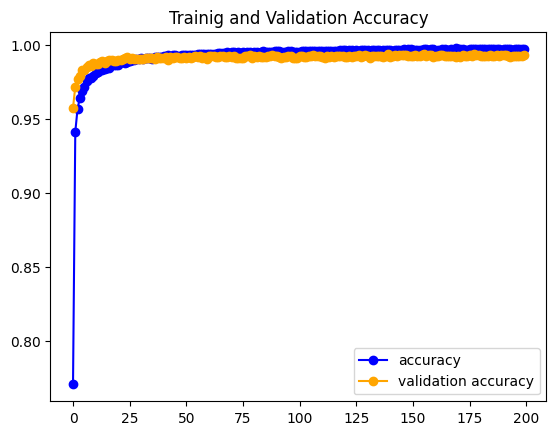

In [57]:
epochs = range(len(history.history['accuracy']))

plt.plot(epochs, history.history['accuracy'], marker='o', color='blue',label='accuracy')
plt.plot(epochs, history.history['val_accuracy'], marker='o' ,color='orange' ,label='validation accuracy')
plt.title('Trainig and Validation Accuracy')

plt.legend()

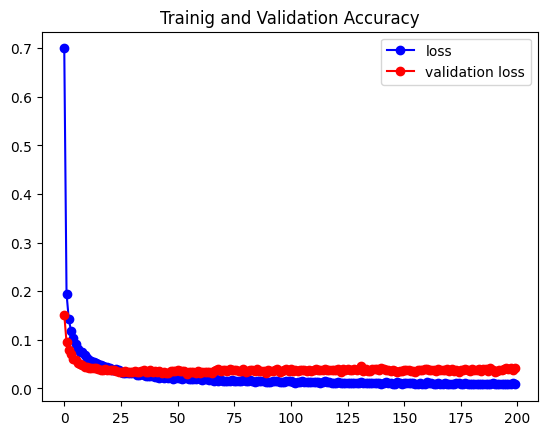

In [58]:
epochs = range(len(history.history['loss']))

plt.plot(epochs, history.history['loss'],  marker='o', color='blue',label='loss')
plt.plot(epochs, history.history['val_loss'],  marker='o', color='red',label='validation loss')
plt.title('Trainig and Validation Accuracy')

plt.legend()

In [ ]:
model.save('models/model_basic_cnn.keras')
model.save_weights('models/model_basic_cnn.weights.h5')

In [52]:
print('Max Acc: ', np.max(history.history['accuracy']) )
print('Max val Acc: ', np.max(history.history['val_accuracy']) )
print()
print('Max loss: ', np.min(history.history['loss']) )
print('Max val loss: ', np.min(history.history['val_loss']) )

Max Acc:  0.9973541498184204
Max val Acc:  0.9939166903495789

Max loss:  0.008034074679017067
Max val loss:  0.030129291117191315
